In [1]:
import sys
import os 
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm import tqdm


plt.style.use('seaborn-v0_8-bright')

Import either Allensdk or Minisdk depending on your computer setup.

In [2]:
# Import Allen SDK

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#If your computer is going low on RAM, commment the line above and use this instead:

sys.path.append('../')
from minisdk.core import EcephysProjectCache

Loading the necessary data. Run the cell depending on the environment you are using.

In [3]:
data_dir = "../allendata"
# Again, we might want to use another folder if we do want to overwrite potential data we have

In [ ]:
data_dir = "../converted"

In [4]:
#From here on everything works with both AllenSDK and the MiniSDK!
manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

#Grab our (filtered) data from our favorite session. We take a female mice with nice unit count
session_id = 798911424 
oursession = cache.get_session_data(session_id)#, timeout=3000)

c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\Users\Keshav Ganesh\anaconda3\envs\envallen\Lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  return func(args[0], **pargs)


In [ ]:
#Takes around 500 MB of disk space, a bit more once is decompressed in RAM
from minisdk.core import Allen2MiniConverter
converter = Allen2MiniConverter()
converter.write_metadata_csv(cache)
converter.write_session_data(oursession)

/Users/daniyarzakarin/Documents/Uni/computational neuroscience/project/notebooks/../minisdk/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sti = pd.read_csv(f"{self.path2data}/stimuli.csv", index_col="stimulus_presentation_id")


In [5]:
# Stimulus names
sti_table = oursession.get_stimulus_table()
sti_names = set(sti_table.stimulus_name)    
print(sti_names)

{'gabors', 'static_gratings', 'drifting_gratings', 'flashes', 'drifting_gratings_contrast', 'natural_scenes', 'natural_movie_one', 'spontaneous', 'natural_movie_three'}


In [6]:
for name in sti_names:
    print(f'There are {(sti_table["stimulus_name"] == name).sum()} stimuli with {name}')

There are 3645 stimuli with gabors
There are 6000 stimuli with static_gratings
There are 630 stimuli with drifting_gratings
There are 150 stimuli with flashes
There are 540 stimuli with drifting_gratings_contrast
There are 5950 stimuli with natural_scenes
There are 18000 stimuli with natural_movie_one
There are 16 stimuli with spontaneous
There are 36000 stimuli with natural_movie_three


In [7]:
mask = (sti_table['stimulus_name'] == 'natural_scenes')
natural_scenes = sti_table[mask]
del mask
natural_scenes.head()

stimulus_block   start_time    stop_time  size  \
stimulus_presentation_id                                                  
51355                               9.0  5909.794447  5910.044666  null   
51356                               9.0  5910.044666  5910.294885  null   
51357                               9.0  5910.294885  5910.545104  null   
51358                               9.0  5910.545104  5910.795324  null   
51359                               9.0  5910.795324  5911.045522  null   

                           stimulus_name spatial_frequency  frame color  \
stimulus_presentation_id                                                  
51355                     natural_scenes              null   13.0  null   
51356                     natural_scenes              null   38.0  null   
51357                     natural_scenes              null   30.0  null   
51358                     natural_scenes              null   35.0  null   
51359                     natural_scenes              null  112.0  null   

                         y_position phase orientation temporal_frequency  \
stimulus_presentation_id                                                   
51355                          null  null        null               null   
51356                          null  null        null               null   
51357                          null  null        null               null   
51358                          null  null        null               null   
51359                          null  null        null               null   

                         contrast x_position  duration  stimulus_condition_id  
stimulus_presentation_id                                                       
51355                        null       null  0.250219                   4908  
51356                        null       null  0.250219                   4909  
51357                        null       null  0.250219                   4910  
51358                        null       null  0.250219                   4911  
51359                        null       null  0.250198                   4912

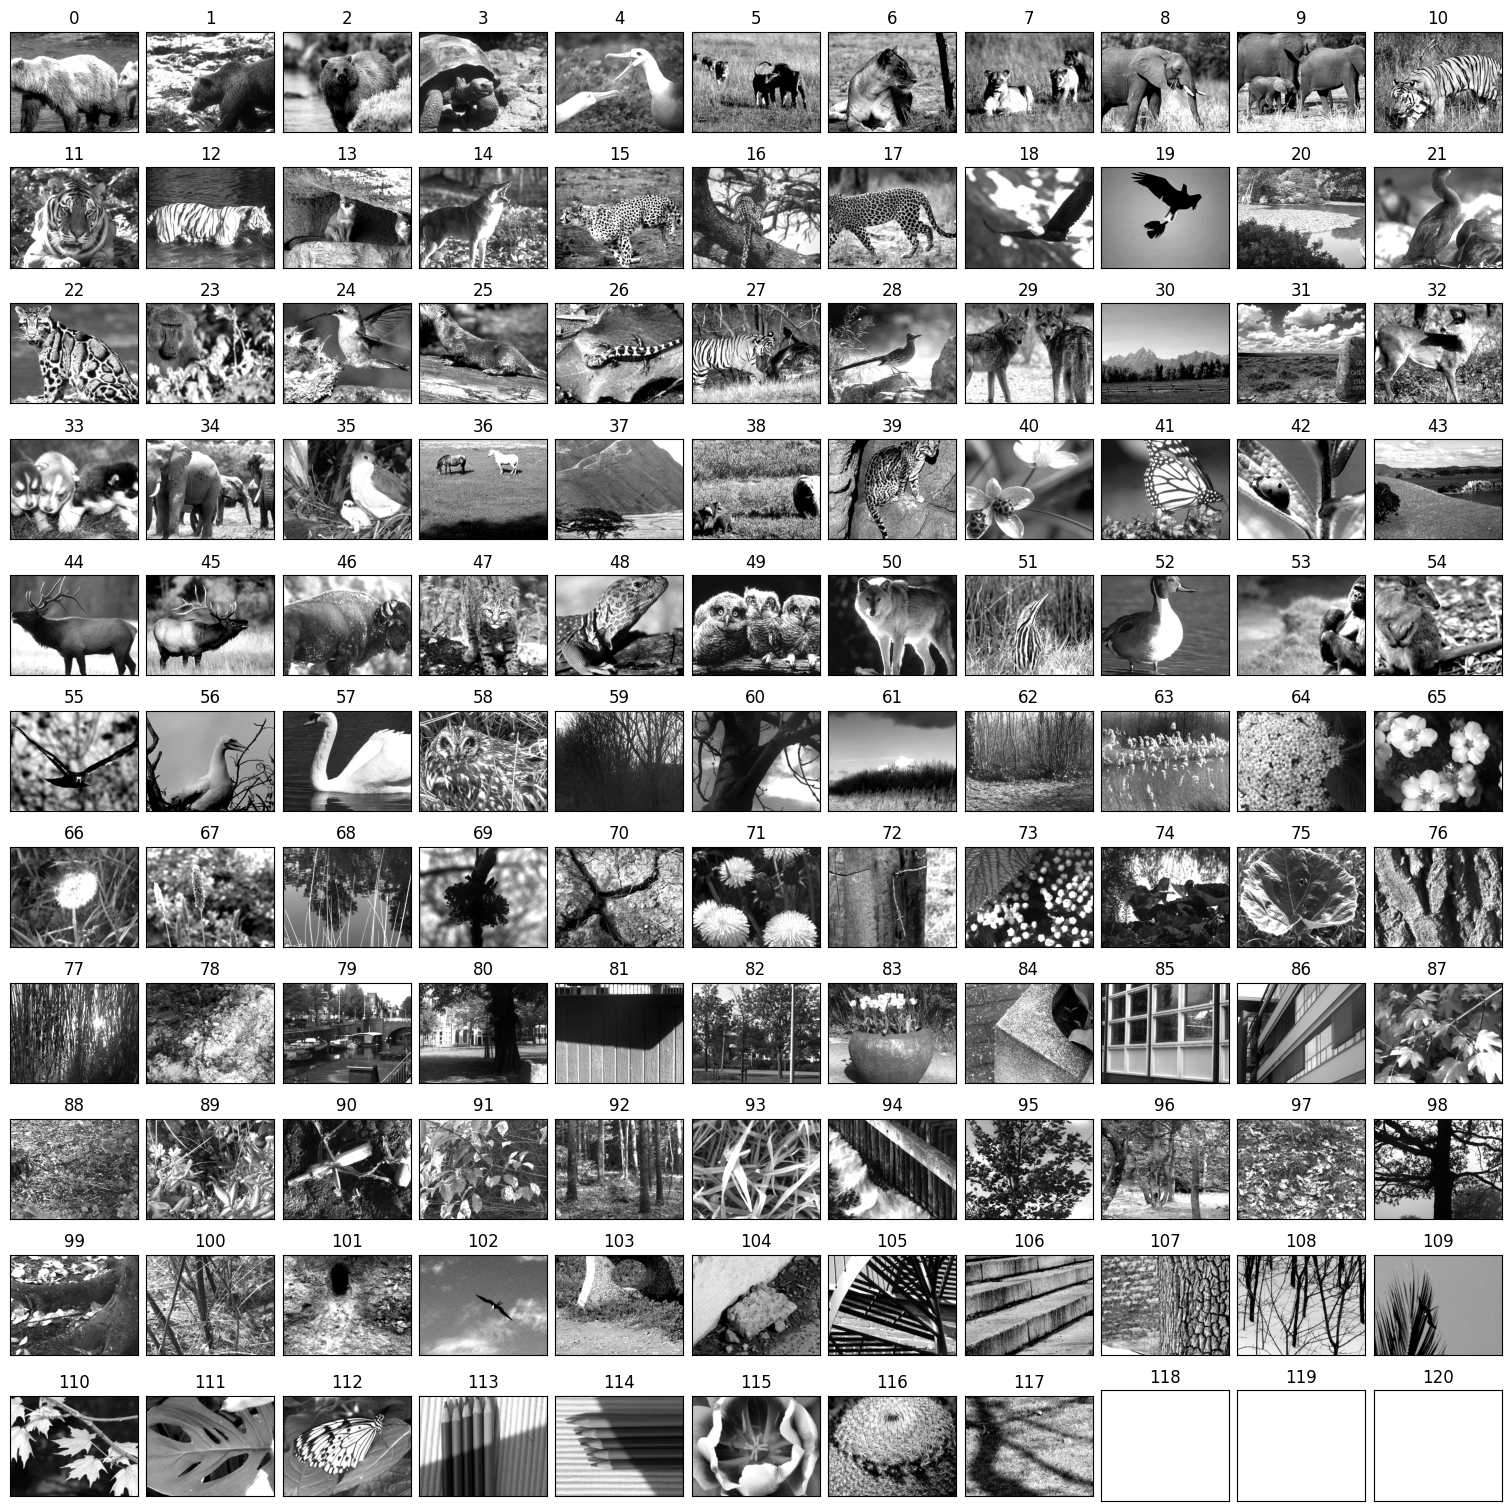

In [ ]:
#Download the 118 photos of the natural scenes. 
#First time they need to be downloaded.
nphotos = 118
for i in range(nphotos):
    tmp = cache.get_natural_scene_template(i)
del tmp

#Convert them to use with the MiniSDK if needed
#converter.write_natural_images()
#Let's create a beautiful 11x11 reference plot with all the images
fig, axes = plt.subplots(ncols=11, nrows=11, figsize=(15,15), layout="constrained")
L = 11
for x in range(L):
    for y in range(L):
        index = y + x*L 
        axes[x,y].set_title(index)
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
        if index < 118:
            axes[x,y].imshow(cache.get_natural_scene_template(index), cmap="gray")

plt.savefig("natural_scenes.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
#Get the ids of the images and the units 
image_ids = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

print(f'We have {image_ids.shape[0]} images and {visam_ids.shape[0]} units')

We have 5950 images and 135 units


In [11]:
image_ids

array([51355, 51356, 51357, ..., 68226, 68227, 68228], dtype=int64)

In [ ]:
natural_scenes.loc[51355]

stimulus_block                      9.0
start_time                  5909.794447
stop_time                   5910.044666
orientation                        null
contrast                           null
spatial_frequency                  null
x_position                         null
y_position                         null
phase                              null
size                               null
temporal_frequency                 null
frame                              13.0
stimulus_name            natural_scenes
color                              null
duration                       0.250219
stimulus_condition_id              4908
Name: 51355, dtype: object

In [8]:
def get_n_spikes_in_time_interval(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes[id] = len(spikes[(spikes > time_start) & (spikes < time_end)])

    return region_spikes

import bisect
def get_n_spikes_in_time_interval_with_bisect(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = {}
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        R = bisect.bisect_left(spikes, time_end)
        L = bisect.bisect_left(spikes, time_start)
        region_spikes[id] = R - L

    return region_spikes


In [9]:
def get_spike_vectors(session, delay : float, stimuli : pd.DataFrame, regionstr : str, window_size : float = None, partial : float = None):
    """Should return a DataFrame where each line corresponds to a vector of 
    spike numbers for each unit. Could be optimized!"""
    sti_ids = stimuli.index.values
    if not partial is None: 
        sti_ids_size = sti_ids.shape[0]
        perm = np.random.permutation(np.arange(sti_ids_size))
        partial_size = int(partial * sti_ids_size)
        sti_ids = sti_ids[perm[:partial_size]]
    rows = []
    for sti_id in sti_ids:
        stimulus = stimuli.loc[sti_id]
        if window_size is None:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.stop_time + delay)
        else:
            region_spikes = get_n_spikes_in_time_interval_with_bisect(session, 
                                                        regionstr, 
                                                        stimulus.start_time + delay, 
                                                        stimulus.start_time + delay + window_size)
        new_row = pd.DataFrame(region_spikes, index = [sti_id])
        rows.append(new_row)
    spike_vectors = pd.concat(rows)
    return spike_vectors

In [14]:
spike_vectors = get_spike_vectors(oursession, 0.0, natural_scenes, "VISam", partial = 0.5)
spike_vectors.shape

(2975, 135)

In [15]:
spike_vectors.head()

951092050  951092075  951092303  951092398  951092369  951092410  \
54198          2          2          6          0          2          4   
53270          4          1          4          2         11          0   
67169          1          5          5          0          1          0   
52737          9          4          7          1          5          0   
51798          3          5          7          0          5          0   

       951092450  951092437  951092475  951092488  ...  951098487  951098546  \
54198          0          6          0          5  ...          0          0   
53270          1          7          0          2  ...          0          2   
67169          3          1          1         11  ...          0          0   
52737          1          7          0          1  ...          0          1   
51798          0          4          0          0  ...          0          0   

       951098530  951098560  951098658  951098850  951098807  951098773  \
54198          3          1          1          0          6          2   
53270          1          1          0          0          1          1   
67169          1          1          0          0          4          6   
52737          0          0          0          0          5          2   
51798          0          2          0          0          3          3   

       951098871  951098928  
54198          1          5  
53270          0          4  
67169          2         10  
52737          0          5  
51798          0          4  

[5 rows x 135 columns]

In [10]:
def get_spikes_in_time_interval(session, regionstr, time_start, time_end):
    #Filter neurons in the desired region
    #IDs of these neuron are set as the indices of the units table
    region_ids = session.units[session.units["ecephys_structure_acronym"]==regionstr].index.values

    #Get the spike times as a list of numpy arrays instead of dictionary
    #spike_times[id] is a numpy array
    region_spikes = []
    for id in region_ids:
        #Filter spikes in the interval (time_start, time_end) ms.
        #A single neuron can have 20000 spikes, and eventplot would struggle
        spikes = session.spike_times[id]
        region_spikes.append(spikes[(spikes > time_start) & (spikes < time_end)])
        
    return region_spikes

In [11]:
#using get_spikes_in_time_interval, plot the spike heatmap for all units in the stimulus start and end time

def plot_spike_heatmap_for_stimlus(session, regionstr, sti_id, delay, window_size):
    #get time_start and time_end of stimulus
    stimulus = natural_scenes.loc[sti_id]
    time_start = stimulus.start_time
    time_end = stimulus.stop_time

    #extend time_end to show the spikes after the stimulus
    time_end += 2*(time_end - time_start)

    #get spikes in the time interval
    spikes = get_spikes_in_time_interval(session, regionstr, time_start, time_end)

    #Do the eventplot!
    plt.eventplot(spikes, orientation="horizontal")
    plt.xlabel("Time")
    plt.xticks([time_start, stimulus.stop_time, time_end])
    plt.ylabel("#VISam Unit")
    plt.title(f"Stimulus {sti_id} spikes; delay {delay}; window size {window_size}")
    #add a vertical line to show the end of the stimulus
    plt.axvline(x=stimulus.stop_time, color="red")
    #add a vertical block of color to show the stimulus duration
    plt.axvspan(stimulus.start_time + delay, stimulus.start_time + delay + window_size, alpha=0.1, color="green")
    plt.show()

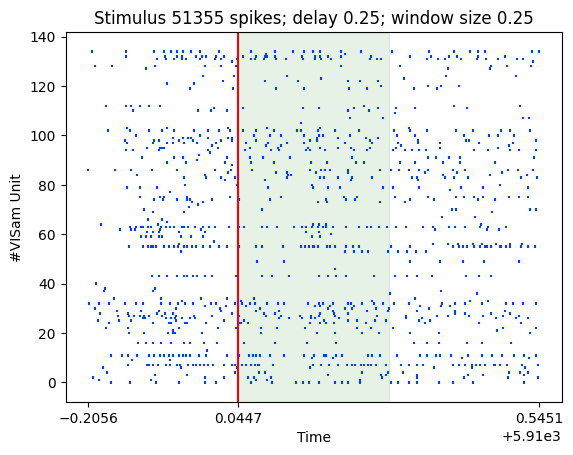

In [63]:
plot_spike_heatmap_for_stimlus(oursession, "VISam", 51355, 0.25, 0.25)

In [12]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

Experiment with delay

In [13]:
def experiment_with_delay(delay : float, stimulus_name, stimuli : pd.DataFrame, regionstr : str = "VISam", window_size : float = None, withlogs = True, partial : float = None):
    spike_vectors = get_spike_vectors(oursession, delay, stimuli, regionstr, window_size, partial = partial)
    stimuli_ids = spike_vectors.index

    #Creating a dictionary which maps the stimulus to its classification label column
    stimulus_label_column = {"natural_scenes": "frame",
                             "flashes": "color",
                             "static_gratings": "orientation",
                             "drifting_gratings": "orientation",
                             "gabors": "orientation",
                             "drifting_gratings_contrast": "orientation"}

    #Find the frame that corresponds to the presentation id and convert it to int numpy array.
    targets = stimuli.loc[stimuli_ids, stimulus_label_column[stimulus_name]] 
    targets = targets.values.astype(int)
    labels = np.unique(targets)  #There should be 118 labels, one per image.

    #The codification of the images, as a 2D numpy array instead 
    spikes_presentation = spike_vectors.values.astype(float)

    if withlogs:
        print(f'Data Shape: {spikes_presentation.shape}')

    #Initialize the vectors
    accuracies = []
    confusions = []

    #KFold.split automatically splits our big table into n_splits parts. Training then is done with n_splits-1 
    #parts and the remaining one is used for test. The procedure then is cross-validated.
    for train_indices, test_indices in KFold(n_splits=5).split(spikes_presentation):
        
        #Generate the Support Vector Machine and fit it using the training dataset
        clf = svm.SVC(gamma="scale", kernel="rbf")
        clf.fit(spikes_presentation[train_indices], targets[train_indices])
        
        #Get the test set and try to predict over it
        test_targets = targets[test_indices]
        test_predictions = clf.predict(spikes_presentation[test_indices])
        
        #Compute the accuracy on this test set and save all of them
        accuracy = 1 - (np.count_nonzero(test_predictions - test_targets) / test_predictions.size)
        
        accuracies.append(accuracy)
        confusions.append(confusion_matrix(y_true=test_targets, y_pred=test_predictions, labels=labels))

    # #Get the mean!
    if withlogs:
        print(f'Experiment with regionstr = {regionstr}, delay = {delay}, partial = {partial}, window_size = {window_size}')
        print(f"Cross-validated mean accuracy: {100*np.mean(accuracies):.1f}%")
        print(f"Ch?ance of random guess: {100/labels.size:.2f}%") #1/118 
    #multiple accuracies list by 100 and return list of accuracies
    accuracies = np.array(accuracies) * 100
    return accuracies


In [20]:
#Get the ids of the images and the units 
image_id = oursession.get_stimulus_table("natural_scenes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

#Get the spikes during the session
visam_spikes = oursession.presentationwise_spike_times(
    stimulus_presentation_ids=image_id,
    unit_ids = visam_ids
)

visam_spikes

# #Add a new column to our table and fill it by counting number of rows with a stimulus presentation and unitid
# visam_spikes["count"] = np.zeros(len(visam_spikes))
# visam_spikes = visam_spikes.groupby(["stimulus_presentation_id", "unit_id"]).count()

# #Employ "pivot table" to use the information from visam_spikes to generate a new table where 
# #we indicate index, columns, and fill it with the count.
# spikes_presentation = pd.pivot_table(
#     visam_spikes,
#     values="count",
#     index="stimulus_presentation_id",
#     columns="unit_id",
#     fill_value=0.0,
#     aggfunc=np.sum
# )

# #This is 50 times faster!
# spikes_presentation

stimulus_presentation_id    unit_id  \
spike_time                                         
5909.794764                     51355  951097547   
5909.796721                     51355  951093080   
5909.801697                     51355  951098928   
5909.803021                     51355  951092303   
5909.805297                     51355  951098560   
...                               ...        ...   
8569.511638                     68228  951092303   
8569.512771                     68228  951093688   
8569.515238                     68228  951098021   
8569.516072                     68228  951097682   
8569.517005                     68228  951097869   

             time_since_stimulus_presentation_onset  
spike_time                                           
5909.794764                                0.000318  
5909.796721                                0.002274  
5909.801697                                0.007251  
5909.803021                                0.008574  
5909.805297                                0.010851  
...                                             ...  
8569.511638                                0.244363  
8569.512771                                0.245497  
8569.515238                                0.247964  
8569.516072                                0.248797  
8569.517005                                0.249731  

[1184297 rows x 3 columns]

In [21]:
accuracies = experiment_with_delay(0.0, "natural_scenes", natural_scenes)
print(accuracies)

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
[22.43697479 19.57983193 17.05882353 18.7394958  17.64705882]


In [25]:
delays = np.arange(0.25, 0.50, 0.05)
accuracies_list = []
for delay in delays:
    accuracies_list.append(experiment_with_delay(delay, "natural_scenes", natural_scenes))


Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.25, partial = None, window_size = None
Cross-validated mean accuracy: 4.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.3, partial = None, window_size = None
Cross-validated mean accuracy: 1.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.35, partial = None, window_size = None
Cross-validated mean accuracy: 1.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.39999999999999997, partial = None, window_size = None
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.44999999999999996, partial = None, window_size = None
Cross-validated mean accuracy: 0.7%
Ch?ance of random guess: 0.84%


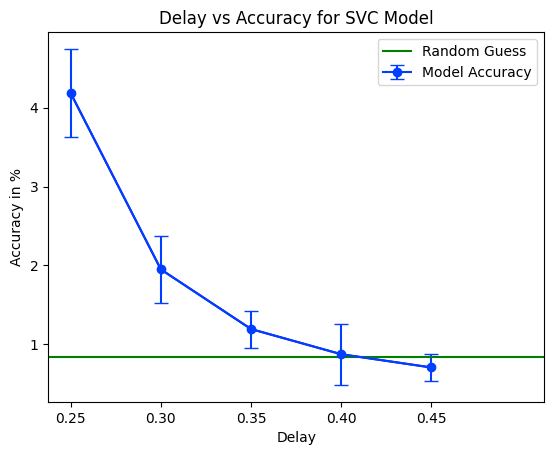

In [29]:
mean_accuracies = [np.mean(acc) for acc in accuracies_list]
std_accuracies = [np.std(acc) for acc in accuracies_list]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.xticks(delays)
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.legend()
plt.show()

In [30]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes))

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 24.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 28.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 31.5%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 32.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.125, partial = None, window_size = No

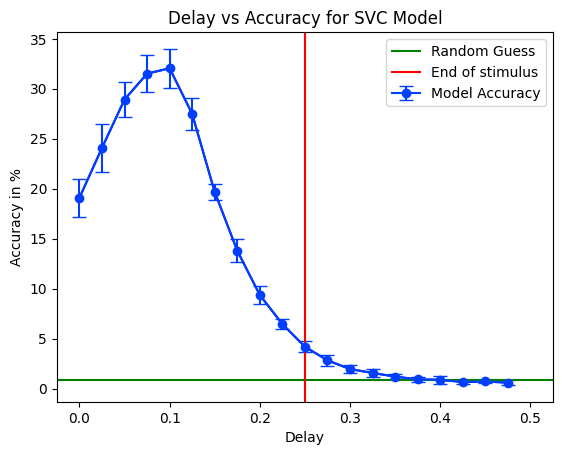

In [36]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

# Trying lower window sizes 

It is possible that the initial increase in accurary is due to some statistical effects. We can do a similiar experiment trying a smaller window size. In theory we should observe the same phenomenon

In [41]:
spike_vectors = get_spike_vectors(oursession, 0.0, natural_scenes, "VISam", window_size=0.05)

In [42]:
spike_vectors

951092050  951092075  951092303  951092398  951092369  951092410  \
51355          1          1          1          0          1          0   
51356          1          2          2          0          2          0   
51357          4          0          1          1          1          0   
51358          2          1          0          1          2          0   
51359          1          0          1          2          2          0   
...          ...        ...        ...        ...        ...        ...   
68224          0          0          0          0          0          0   
68225          0          2          0          0          2          1   
68226          0          1          0          0          2          0   
68227          0          0          1          0          1          0   
68228          0          0          1          0          1          1   

       951092450  951092437  951092475  951092488  ...  951098487  951098546  \
51355          1          0          0          0  ...          0          0   
51356          0          6          0          0  ...          0          0   
51357          0          3          0          0  ...          0          0   
51358          1          5          0          0  ...          0          0   
51359          0          2          0          1  ...          0          0   
...          ...        ...        ...        ...  ...        ...        ...   
68224          0          0          0          0  ...          0          0   
68225          0          0          0          1  ...          0          0   
68226          0          2          0          1  ...          0          0   
68227          0          1          0          0  ...          0          0   
68228          0          0          0          1  ...          0          0   

       951098530  951098560  951098658  951098850  951098807  951098773  \
51355          0          2          0          0          0          0   
51356          0          0          0          0          3          4   
51357          0          1          0          0          0          1   
51358          1          1          0          0          1          2   
51359          1          0          0          0          5          2   
...          ...        ...        ...        ...        ...        ...   
68224          0          0          0          0          0          0   
68225          0          0          0          0          3          1   
68226          0          2          0          0          0          1   
68227          0          2          0          0          0          0   
68228          0          2          0          1          1          1   

       951098871  951098928  
51355          0          1  
51356          1          1  
51357          0          1  
51358          0          2  
51359          1          2  
...          ...        ...  
68224          0          1  
68225          0          0  
68226          0          2  
68227          0          2  
68228          0          1  

[5950 rows x 135 columns]

In [43]:
delays = np.arange(0.0, 0.50, 0.025)
window_size = 0.05
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, window_size = window_size))    

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = 0.05
Cross-validated mean accuracy: 0.8%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.025, partial = None, window_size = 0.05
Cross-validated mean accuracy: 0.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.05, partial = None, window_size = 0.05
Cross-validated mean accuracy: 3.4%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.07500000000000001, partial = None, window_size = 0.05
Cross-validated mean accuracy: 11.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.1, partial = None, window_size = 0.05
Cross-validated mean accuracy: 18.5%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.125, partial = None, window_size = 0.05


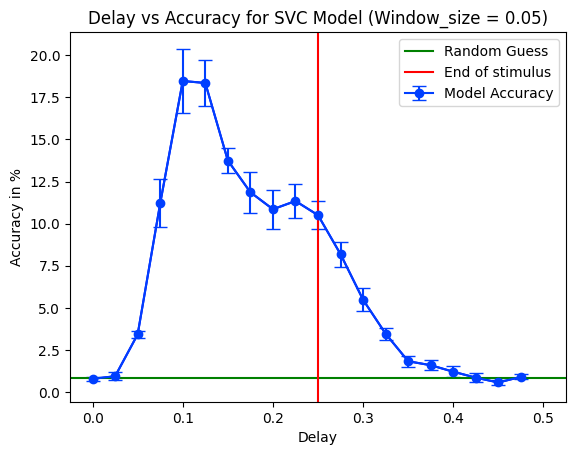

In [44]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (Window_size = 0.05)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

idea : in one graph several of those for different window sizes...

idea: finding optimal window size.... 

idea: plot the variance of the labels.... then maybe we need to apply normalization <- heatmap

idea: best remembered images...

In [45]:
window_sizes = np.arange(0.05, 0.25 + 1e-5, 0.05)
result_per_window_size = {}

print(f'Window sizes : {list(window_sizes)}')
for window_size in window_sizes:
    delays = np.arange(0.0, 0.50, 0.025)
    accuracies = []
    for delay in tqdm(delays, desc=f"Calculating accurary curve for window_size = {window_size}..."):
        accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, "VISam", window_size, withlogs = False))
    result_per_window_size[window_size] = (delays, accuracies)

Window sizes : [0.05, 0.1, 0.15000000000000002, 0.2, 0.25]


Calculating accurary curve for window_size = 0.05...:   0%|          | 0/20 [00:00<?, ?it/s]

Calculating accurary curve for window_size = 0.05...: 100%|██████████| 20/20 [22:33<00:00, 67.67s/it]
Calculating accurary curve for window_size = 0.1...: 100%|██████████| 20/20 [1:37:10<00:00, 291.53s/it]   
Calculating accurary curve for window_size = 0.15000000000000002...: 100%|██████████| 20/20 [25:14<00:00, 75.73s/it]
Calculating accurary curve for window_size = 0.2...: 100%|██████████| 20/20 [24:58<00:00, 74.91s/it]
Calculating accurary curve for window_size = 0.25...: 100%|██████████| 20/20 [25:56<00:00, 77.80s/it]


In [46]:
import pickle

# Export dictionary to a JSON file
with open('cashed_data/result_per_window_size.pickle', 'wb') as pickle_file:
    pickle.dump(result_per_window_size, pickle_file)


In [47]:
with open('cashed_data/result_per_window_size.pickle', 'rb') as pickle_file:
    result_per_window_size = pickle.load(pickle_file)

result_per_window_size

{0.05: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475]),
  [array([0.84033613, 0.92436975, 0.84033613, 0.75630252, 0.58823529]),
   array([0.75630252, 1.2605042 , 0.58823529, 1.00840336, 1.09243697]),
   array([3.78151261, 3.27731092, 3.44537815, 3.44537815, 3.19327731]),
   array([12.85714286, 12.94117647, 10.25210084, 10.50420168,  9.49579832]),
   array([21.00840336, 20.25210084, 17.73109244, 17.56302521, 15.79831933]),
   array([19.74789916, 17.89915966, 16.30252101, 20.        , 17.81512605]),
   array([14.3697479 , 14.3697479 , 13.52941176, 14.03361345, 12.43697479]),
   array([14.03361345, 10.67226891, 11.93277311, 12.01680672, 10.67226891]),
   array([12.01680672, 12.10084034,  8.99159664, 10.75630252, 10.42016807]),
   array([12.01680672, 10.92436975,  9.57983193, 11.93277311, 12.26890756]),
   array([10.58823529, 11.34453782,  8.90756303, 11.00840336, 10.67226

In [50]:
result_per_window_size.items()

dict_items([(0.05, (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475]), [array([0.84033613, 0.92436975, 0.84033613, 0.75630252, 0.58823529]), array([0.75630252, 1.2605042 , 0.58823529, 1.00840336, 1.09243697]), array([3.78151261, 3.27731092, 3.44537815, 3.44537815, 3.19327731]), array([12.85714286, 12.94117647, 10.25210084, 10.50420168,  9.49579832]), array([21.00840336, 20.25210084, 17.73109244, 17.56302521, 15.79831933]), array([19.74789916, 17.89915966, 16.30252101, 20.        , 17.81512605]), array([14.3697479 , 14.3697479 , 13.52941176, 14.03361345, 12.43697479]), array([14.03361345, 10.67226891, 11.93277311, 12.01680672, 10.67226891]), array([12.01680672, 12.10084034,  8.99159664, 10.75630252, 10.42016807]), array([12.01680672, 10.92436975,  9.57983193, 11.93277311, 12.26890756]), array([10.58823529, 11.34453782,  8.90756303, 11.00840336, 10.67226891]), array([9.15966387

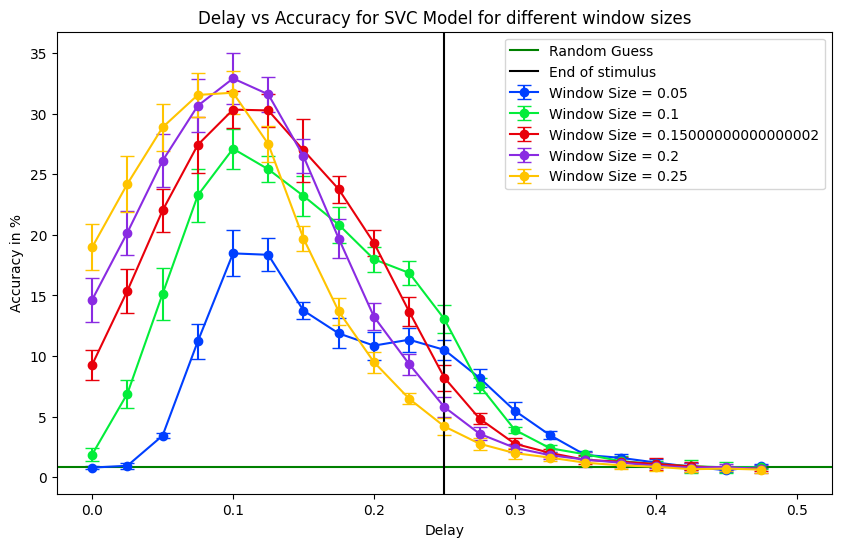

In [61]:
#for each window size, get the mean accuracy and standard deviation of the accuracies

plt.figure(figsize=(10, 6))

for window_size, result in result_per_window_size.items():
    mean_accuracies = [np.mean(acc) for acc in result[1]]
    std_accuracies = [np.std(acc) for acc in result[1]]
    plt.errorbar(result[0], mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = f'Window Size = {window_size}')
 
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'black', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model for different window sizes')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

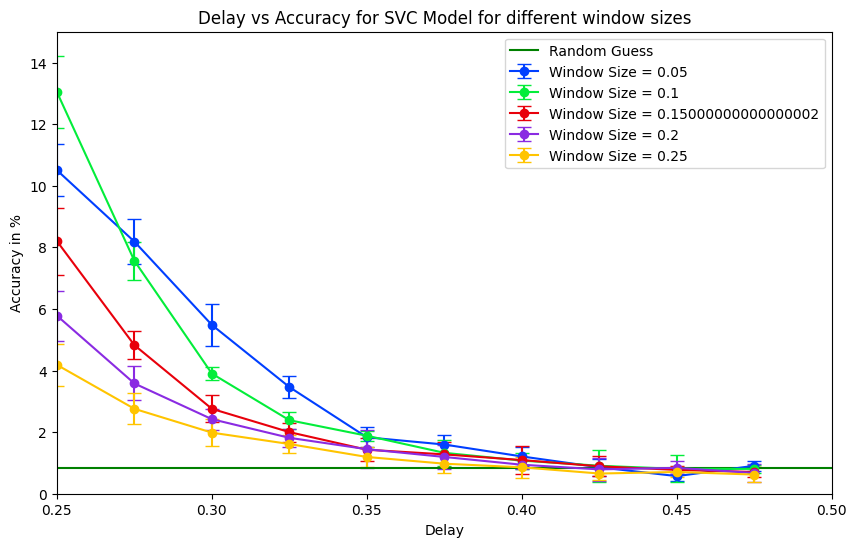

In [63]:
#zoomed in version

plt.figure(figsize=(10, 6))

for window_size, result in result_per_window_size.items():
    mean_accuracies = [np.mean(acc) for acc in result[1]]
    std_accuracies = [np.std(acc) for acc in result[1]]
    plt.errorbar(result[0], mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label=f'Window Size = {window_size}')

plt.axline((0.25, 0.84), (0.5, 0.84), color='green', label='Random Guess')

# Setting x-axis limits to show only from 0.25 to 0.5 and y axis limits to show only from 0 to 15
plt.xlim(0.25, 0.5)
plt.ylim(0,15)

plt.title('Delay vs Accuracy for SVC Model for different window sizes')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

There is this weird inverse effect on the tail. The windows sizes with highest accuracy have the lowest retention.

Heatmap of the variance. One the x-axis we have the delay. On the y-axis we have the window size. 

In [113]:
window_sizes = np.round(np.arange(0.05, 0.25 + 1e-5, 0.05), 2)
delays = np.round(np.arange(0.0, 0.50, 0.025), 2) 

variance_hm = []

for window_size in tqdm(window_sizes, "Calculating variance heatmap"):
    variance_lst = []
    for delay in delays:
        spike_vectors = get_spike_vectors(oursession, delay, natural_scenes, "VISam", window_size)
        spikes_presentation = spike_vectors.values.astype(float)
        variance_lst.append(spikes_presentation.var())
    variance_hm.append(variance_lst)

Calculating variance heatmap: 100%|██████████| 5/5 [08:22<00:00, 100.52s/it]


In [114]:
# Export dictionary to a pickle file
with open('cashed_data/variance_heatmanp.pickle', 'wb') as pickle_file:
    pickle.dump(variance_hm, pickle_file)

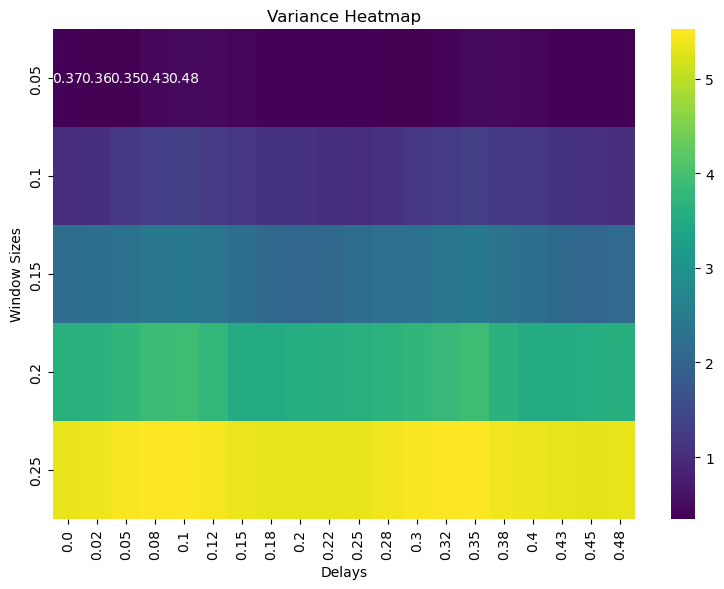

In [115]:
with open('cashed_data/variance_heatmanp.pickle', 'rb') as pickle_file:
    variance_hm = pickle.load(pickle_file)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(variance_hm, annot=True, cmap='viridis', xticklabels=delays, yticklabels=window_sizes)  # 'viridis' is just one of many available colormaps
plt.title('Variance Heatmap')
plt.xlabel('Delays')
plt.ylabel('Window Sizes')
plt.tight_layout()
plt.show()

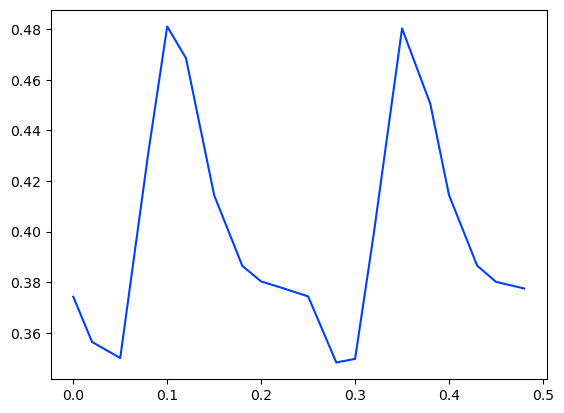

In [116]:
plt.plot(delays, variance_hm[0])

## Other Stimuli

We repeat this experiment with other stimuli, namely flashes and drifting gratings contrast, these 2 stimuli are the ones that have gaps during the presentation.

### Flashes


In [64]:
# Get flashes data

flashes = oursession.get_stimulus_table("flashes")
flashes.head()

stimulus_block   start_time    stop_time  \
stimulus_presentation_id                                            
3647                                1.0  1285.929787  1286.179996   
3648                                1.0  1287.931477  1288.181681   
3649                                1.0  1289.933157  1290.183361   
3650                                1.0  1291.934847  1292.185046   
3651                                1.0  1293.936507  1294.186708   

                         spatial_frequency            size       phase color  \
stimulus_presentation_id                                                       
3647                            [0.0, 0.0]  [300.0, 300.0]  [0.0, 0.0]  -1.0   
3648                            [0.0, 0.0]  [300.0, 300.0]  [0.0, 0.0]  -1.0   
3649                            [0.0, 0.0]  [300.0, 300.0]  [0.0, 0.0]  -1.0   
3650                            [0.0, 0.0]  [300.0, 300.0]  [0.0, 0.0]  -1.0   
3651                            [0.0, 0.0]  [300.0, 300.0]  [0.0, 0.0]   1.0   

                         stimulus_name orientation contrast  duration  \
stimulus_presentation_id                                                
3647                           flashes         0.0      0.8  0.250209   
3648                           flashes         0.0      0.8  0.250204   
3649                           flashes         0.0      0.8  0.250204   
3650                           flashes         0.0      0.8  0.250199   
3651                           flashes         0.0      0.8  0.250202   

                          stimulus_condition_id  
stimulus_presentation_id                         
3647                                        244  
3648                                        244  
3649                                        244  
3650                                        244  
3651                                        245

In [65]:
flashes.shape

(150, 12)

In [66]:
#Get the ids of the flashes and the units 
image_id = oursession.get_stimulus_table("flashes").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

#Get the spikes during the session
visam_spikes = oursession.presentationwise_spike_times(
    stimulus_presentation_ids=image_id,
    unit_ids = visam_ids
)

visam_spikes

stimulus_presentation_id    unit_id  \
spike_time                                         
1285.932943                      3647  951093283   
1285.933143                      3647  951093080   
1285.937210                      3647  951092940   
1285.941569                      3647  951098229   
1285.943536                      3647  951098105   
...                               ...        ...   
1584.421248                      3796  951092437   
1584.421415                      3796  951092369   
1584.426782                      3796  951093565   
1584.427082                      3796  951092940   
1584.428615                      3796  951093080   

             time_since_stimulus_presentation_onset  
spike_time                                           
1285.932943                                0.003157  
1285.933143                                0.003357  
1285.937210                                0.007423  
1285.941569                                0.011782  
1285.943536                                0.013749  
...                                             ...  
1584.421248                                0.242172  
1584.421415                                0.242339  
1584.426782                                0.247705  
1584.427082                                0.248005  
1584.428615                                0.249539  

[23275 rows x 3 columns]

In [67]:
experiment_with_delay(0.0, "flashes", flashes)

Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 90.0%
Ch?ance of random guess: 50.00%


array([90.        , 96.66666667, 93.33333333, 83.33333333, 86.66666667])

We get a much higher accuracy because we only have 2 labels for the color. We will measure over a larger delay because the gap between 2 flashes is approximately 1.75 seconds.

In [70]:
delays = np.arange(0.0, 2.0, 0.05)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "flashes", flashes))

Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 90.0%
Ch?ance of random guess: 50.00%
Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 96.0%
Ch?ance of random guess: 50.00%
Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 98.0%
Ch?ance of random guess: 50.00%
Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.15000000000000002, partial = None, window_size = None
Cross-validated mean accuracy: 96.7%
Ch?ance of random guess: 50.00%
Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.2, partial = None, window_size = None
Cross-validated mean accuracy: 92.0%
Ch?ance of random guess: 50.00%
Data Shape: (150, 135)
Experiment with regionstr = VISam, delay = 0.25, partial = None, window_size = None
C

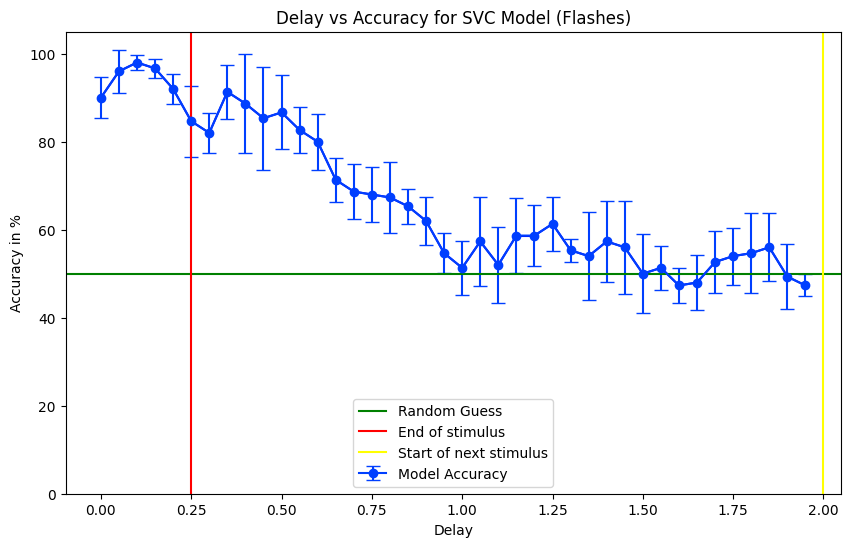

In [78]:
# plot the graph

mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.figure(figsize=(10, 6))
plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.ylim(0,105)
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (Flashes)')
plt.axline((0.25, 50), (0.5, 50), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.axvline(2.0, 0, 30, color = 'yellow', label = 'Start of next stimulus')
plt.legend()
#shift plot legend to the top of the chart
plt.legend(loc='best')
plt.show()

### Drifting Gratings Contrast

Here we use the spike data to classify orienation. There is a gap of 0.5 seconds between each stimulus.

In [74]:
#Get Drifting Gratings Contrast data

drifting_gratings_contrast = oursession.get_stimulus_table("drifting_gratings_contrast")
drifting_gratings_contrast.head()

stimulus_block   start_time    stop_time  \
stimulus_presentation_id                                            
70391                              15.0  9182.529857  9183.030265   
70392                              15.0  9183.530674  9184.031095   
70393                              15.0  9184.531517  9185.031935   
70394                              15.0  9185.532354  9186.032765   
70395                              15.0  9186.533177  9187.033600   

                         spatial_frequency            size  \
stimulus_presentation_id                                     
70391                                 0.04  [250.0, 250.0]   
70392                                 0.04  [250.0, 250.0]   
70393                                 0.04  [250.0, 250.0]   
70394                                 0.04  [250.0, 250.0]   
70395                                 0.04  [250.0, 250.0]   

                                                     phase  \
stimulus_presentation_id                                     
70391                     [19258.96666667, 19258.96666667]   
70392                     [19258.96666667, 19258.96666667]   
70393                     [19258.96666667, 19258.96666667]   
70394                     [19258.96666667, 19258.96666667]   
70395                     [19258.96666667, 19258.96666667]   

                                       stimulus_name orientation contrast  \
stimulus_presentation_id                                                    
70391                     drifting_gratings_contrast        90.0     0.08   
70392                     drifting_gratings_contrast         0.0     0.08   
70393                     drifting_gratings_contrast        45.0     0.04   
70394                     drifting_gratings_contrast        45.0     0.01   
70395                     drifting_gratings_contrast        90.0     0.04   

                         temporal_frequency  duration  stimulus_condition_id  
stimulus_presentation_id                                                      
70391                                   2.0  0.500408                   5027  
70392                                   2.0  0.500422                   5028  
70393                                   2.0  0.500418                   5029  
70394                                   2.0  0.500412                   5030  
70395                                   2.0  0.500423                   5031

In [75]:
drifting_gratings_contrast.shape

(540, 12)

In [76]:
#Get the ids of the stimuli and the units 
image_id = oursession.get_stimulus_table("drifting_gratings_contrast").index.values
visam_ids = oursession.units[oursession.units["ecephys_structure_acronym"]=="VISam"].index.values

#Get the spikes during the session
visam_spikes = oursession.presentationwise_spike_times(
    stimulus_presentation_ids=image_id,
    unit_ids = visam_ids
)

visam_spikes

stimulus_presentation_id    unit_id  \
spike_time                                         
9182.530863                     70391  951098317   
9182.530866                     70391  951094516   
9182.531166                     70391  951092410   
9182.531930                     70391  951098346   
9182.532430                     70391  951098075   
...                               ...        ...   
9722.495845                     70930  951094516   
9722.496554                     70930  951098807   
9722.497020                     70930  951097603   
9722.497487                     70930  951098928   
9722.497754                     70930  951097919   

             time_since_stimulus_presentation_onset  
spike_time                                           
9182.530863                                0.001007  
9182.530866                                0.001010  
9182.531166                                0.001310  
9182.531930                                0.002074  
9182.532430                                0.002574  
...                                             ...  
9722.495845                                0.498462  
9722.496554                                0.499170  
9722.497020                                0.499637  
9722.497487                                0.500104  
9722.497754                                0.500370  

[242805 rows x 3 columns]

In [77]:
experiment_with_delay(0.0, "drifting_gratings_contrast", drifting_gratings_contrast)

Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 81.5%
Ch?ance of random guess: 25.00%


array([79.62962963, 84.25925926, 81.48148148, 86.11111111, 75.92592593])

In [84]:
delays = np.arange(0.0, 1.0, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "drifting_gratings_contrast", drifting_gratings_contrast))

Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 81.5%
Ch?ance of random guess: 25.00%
Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 82.0%
Ch?ance of random guess: 25.00%
Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 82.6%
Ch?ance of random guess: 25.00%
Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 82.2%
Ch?ance of random guess: 25.00%
Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 81.9%
Ch?ance of random guess: 25.00%
Data Shape: (540, 135)
Experiment with regionstr = VISam, delay = 0.125, partial = None, window_size = Non

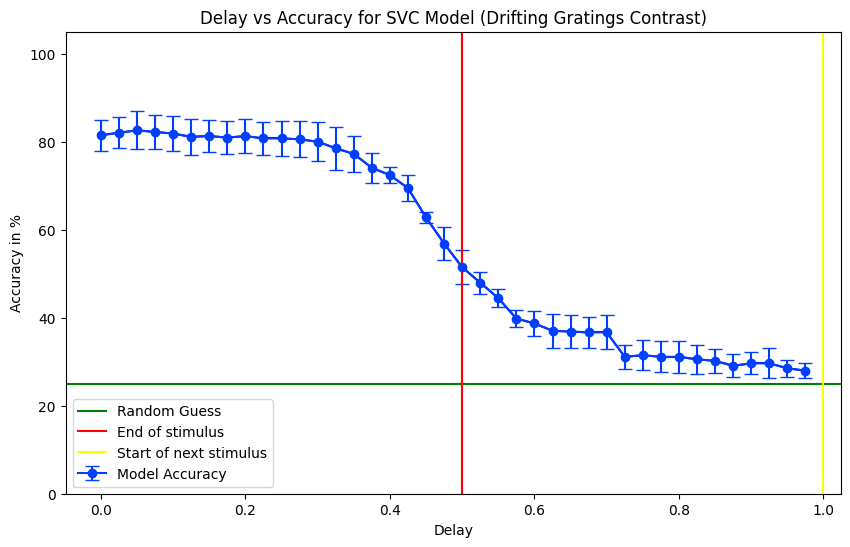

In [86]:
# plot the graph

mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.figure(figsize=(10, 6))
plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.ylim(0,105)
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (Drifting Gratings Contrast)')
plt.axline((0.25, 25), (0.5, 25), color = 'green', label = 'Random Guess')
plt.axvline(0.5, 0, 30, color = 'red', label = 'End of stimulus')
plt.axvline(1.0, 0, 30, color = 'yellow', label = 'Start of next stimulus')
plt.legend()
#shift plot legend to the top of the chart
plt.legend(loc='best')
plt.show()

## Trying different window sizes

### Flashes


In [87]:
window_sizes = np.arange(0.05, 0.25 + 1e-5, 0.05)
result_per_window_size = {}

print(f'Window sizes : {list(window_sizes)}')
for window_size in window_sizes:
    delays = np.arange(0.0, 2.0, 0.05)
    accuracies = []
    for delay in tqdm(delays, desc=f"Calculating accurary curve for window_size = {window_size}..."):
        accuracies.append(experiment_with_delay(delay, "flashes", flashes, "VISam", window_size, withlogs = False))
    result_per_window_size[window_size] = (delays, accuracies)

Window sizes : [0.05, 0.1, 0.15000000000000002, 0.2, 0.25]


Calculating accurary curve for window_size = 0.05...: 100%|██████████| 40/40 [00:45<00:00,  1.13s/it]
Calculating accurary curve for window_size = 0.1...: 100%|██████████| 40/40 [00:47<00:00,  1.19s/it]
Calculating accurary curve for window_size = 0.15000000000000002...: 100%|██████████| 40/40 [00:51<00:00,  1.29s/it]
Calculating accurary curve for window_size = 0.2...: 100%|██████████| 40/40 [00:43<00:00,  1.10s/it]
Calculating accurary curve for window_size = 0.25...: 100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


In [88]:
import pickle

# Export dictionary to a JSON file
with open('cashed_data/result_per_window_size_flashes.pickle', 'wb') as pickle_file:
    pickle.dump(result_per_window_size, pickle_file)

In [89]:
with open('cashed_data/result_per_window_size_flashes.pickle', 'rb') as pickle_file:
    result_per_window_size = pickle.load(pickle_file)

result_per_window_size

{0.05: (array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
         1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
         1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95]),
  [array([70.        , 33.33333333, 46.66666667, 26.66666667, 46.66666667]),
   array([86.66666667, 90.        , 93.33333333, 83.33333333, 93.33333333]),
   array([ 83.33333333, 100.        ,  93.33333333,  70.        ,
           83.33333333]),
   array([80.        , 90.        , 93.33333333, 90.        , 90.        ]),
   array([100.        ,  90.        ,  93.33333333,  90.        ,
           86.66666667]),
   array([ 83.33333333,  90.        ,  96.66666667,  96.66666667,
          100.        ]),
   array([100.        ,  96.66666667,  96.66666667,  96.66666667,
          100.        ]),
   array([83.33333333, 83.33333333, 93.33333333, 90.        , 83.33333333]),
   array([80.        , 80.        , 90. 

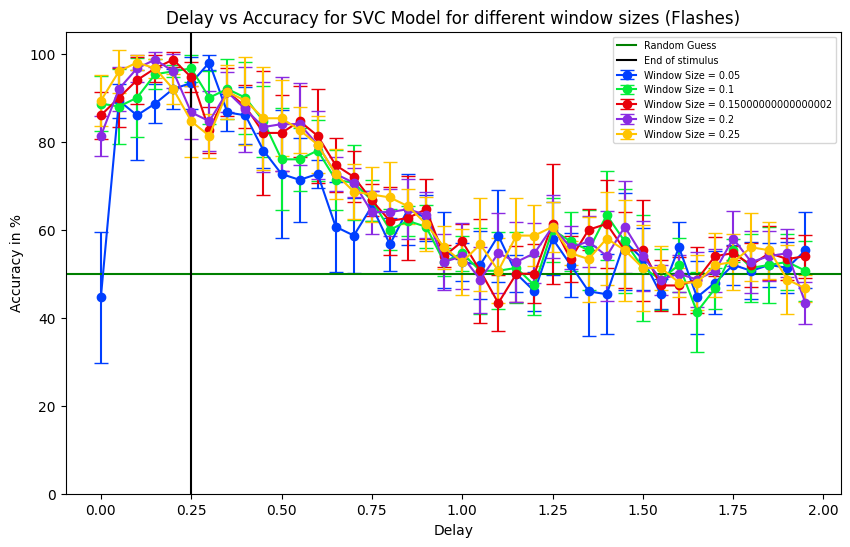

In [95]:
plt.figure(figsize=(10, 6))

for window_size, result in result_per_window_size.items():
    mean_accuracies = [np.mean(acc) for acc in result[1]]
    std_accuracies = [np.std(acc) for acc in result[1]]
    plt.errorbar(result[0], mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = f'Window Size = {window_size}')
 
plt.ylim(0, 105)
plt.axline((0.25, 50), (0.5, 50), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'black', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model for different window sizes (Flashes)')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend(fontsize='x-small')
plt.show()

### Drifting Gratings Contrast


In [96]:
window_sizes = np.arange(0.1, 0.50 + 1e-5, 0.1)
result_per_window_size = {}

print(f'Window sizes : {list(window_sizes)}')
for window_size in window_sizes:
    delays = np.arange(0.0, 1.0, 0.025)
    accuracies = []
    for delay in tqdm(delays, desc=f"Calculating accurary curve for window_size = {window_size}..."):
        accuracies.append(experiment_with_delay(delay, "drifting_gratings_contrast", drifting_gratings_contrast, "VISam", window_size, withlogs = False))
    result_per_window_size[window_size] = (delays, accuracies)

Window sizes : [0.1, 0.2, 0.30000000000000004, 0.4, 0.5]


Calculating accurary curve for window_size = 0.1...: 100%|██████████| 40/40 [02:34<00:00,  3.87s/it]
Calculating accurary curve for window_size = 0.2...: 100%|██████████| 40/40 [02:53<00:00,  4.35s/it]
Calculating accurary curve for window_size = 0.30000000000000004...: 100%|██████████| 40/40 [03:08<00:00,  4.71s/it]
Calculating accurary curve for window_size = 0.4...: 100%|██████████| 40/40 [02:18<00:00,  3.47s/it]
Calculating accurary curve for window_size = 0.5...: 100%|██████████| 40/40 [02:17<00:00,  3.43s/it]


In [97]:
import pickle

# Export dictionary to a JSON file
with open('cashed_data/result_per_window_size_drifting_gratings_contrast.pickle', 'wb') as pickle_file:
    pickle.dump(result_per_window_size, pickle_file)


In [98]:
with open('cashed_data/result_per_window_size_drifting_gratings_contrast.pickle', 'rb') as pickle_file:
    result_per_window_size = pickle.load(pickle_file)

result_per_window_size

{0.1: (array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
         0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
         0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
         0.9  , 0.925, 0.95 , 0.975]),
  [array([43.51851852, 48.14814815, 58.33333333, 53.7037037 , 53.7037037 ]),
   array([63.88888889, 60.18518519, 71.2962963 , 63.88888889, 65.74074074]),
   array([65.74074074, 73.14814815, 74.07407407, 68.51851852, 67.59259259]),
   array([66.66666667, 73.14814815, 80.55555556, 74.07407407, 72.22222222]),
   array([66.66666667, 69.44444444, 73.14814815, 72.22222222, 68.51851852]),
   array([67.59259259, 65.74074074, 68.51851852, 68.51851852, 64.81481481]),
   array([69.44444444, 69.44444444, 75.        , 68.51851852, 66.66666667]),
   array([74.07407407, 72.22222222, 79.62962963, 73.14814815, 71.2962963 ]),
   array([75.92592593, 74.07407407, 82.40740741, 72.

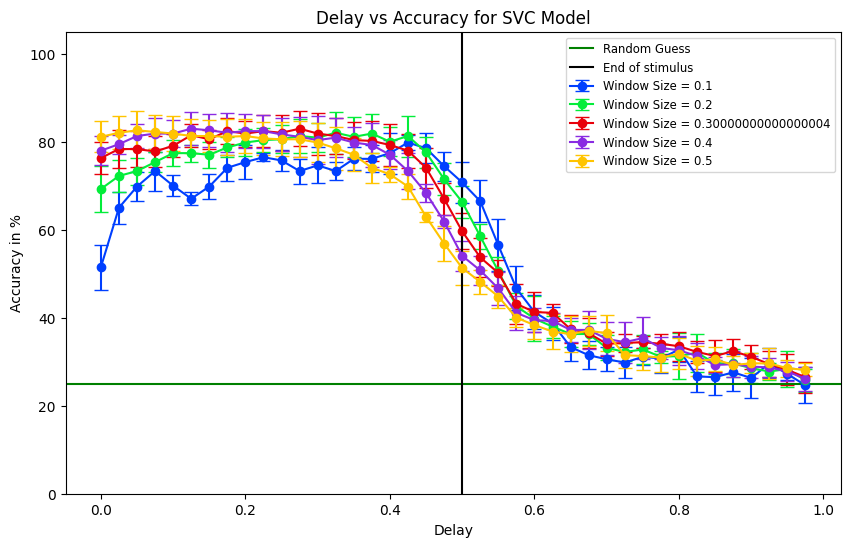

In [100]:
plt.figure(figsize=(10, 6))

for window_size, result in result_per_window_size.items():
    mean_accuracies = [np.mean(acc) for acc in result[1]]
    std_accuracies = [np.std(acc) for acc in result[1]]
    plt.errorbar(result[0], mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = f'Window Size = {window_size}')
 
plt.ylim(0, 105)
plt.axline((0.25, 25), (0.5, 25), color = 'green', label = 'Random Guess')
plt.axvline(0.5, 0, 30, color = 'black', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model for different window sizes (Drifting Gratings Contrast)')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
#place legend outside
plt.legend(loc='upper right', fontsize = 'small')
plt.show()

## Repeating experiment across different brain regions

Repeated experiment with VISp, VISrl, VISl and VISal. Basically all the visual cortex regions.

### VISp

In [85]:
get_spike_vectors(oursession, 0.0, natural_scenes, "VISp")

951102411  951102534  951102476  951102555  951102623  951102601  \
51355          0          8          1          3          7          0   
51356          0          1          0          5         18          0   
51357          1          1          1          7          6          0   
51358          1          1          0          4          9          0   
51359          1          1          0          4          3          0   
...          ...        ...        ...        ...        ...        ...   
68224          2          1          0          2          0          0   
68225          0          0          0          2          2          0   
68226          0          2          0          7          2          1   
68227          2          2          0          3          1          1   
68228          2          3          1          5          1          1   

       951102646  951102686  951102673  951102934  ...  951104555  951105377  \
51355          1         13          2          3  ...          3          0   
51356          0          9          3          3  ...          5          0   
51357          0          9          0          2  ...          3          0   
51358          1          8          2          3  ...          0          1   
51359          0         11          0          3  ...          4          0   
...          ...        ...        ...        ...  ...        ...        ...   
68224          0          3          1          0  ...          0          0   
68225          0          4          3          0  ...          0          0   
68226          0          6          0          3  ...          0          0   
68227          0          8          2          4  ...          0          0   
68228          0         10          1          0  ...          0          0   

       951104544  951104532  951104510  951104661  951104746  951104719  \
51355          4          4         13          0         11          0   
51356          1          1          7          0          8          0   
51357          1          1          1          3          3          0   
51358          1          1          6          0          2          0   
51359          0          0         10          0          9          0   
...          ...        ...        ...        ...        ...        ...   
68224          0          0          1          0          1          0   
68225          0          3          3          0          3          1   
68226          0          0          3          3          4          0   
68227          2          0          4          1          5          0   
68228          0          2          2          0          4          0   

       951104695  951104832  
51355          0          2  
51356          0          1  
51357          0          0  
51358          0          1  
51359          0          1  
...          ...        ...  
68224          0          0  
68225          0          3  
68226          0          1  
68227          0          1  
68228          0          0  

[5950 rows x 94 columns]

In [86]:
accuracies = experiment_with_delay(0.0, "natural_scenes", natural_scenes, regionstr = "VISp")
print(accuracies)
print(f'Mean accuracy: {np.mean(accuracies)}')

Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 45.5%
Ch?ance of random guess: 0.84%
[60.33613445 46.80672269 39.41176471 40.25210084 40.92436975]
Mean accuracy: 45.54621848739496


In [87]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, regionstr = "VISp"))

Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 45.5%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 52.0%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 57.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 58.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 55.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 94)
Experiment with regionstr = VISp, delay = 0.125, partial = None, window_size = None
Cross-val

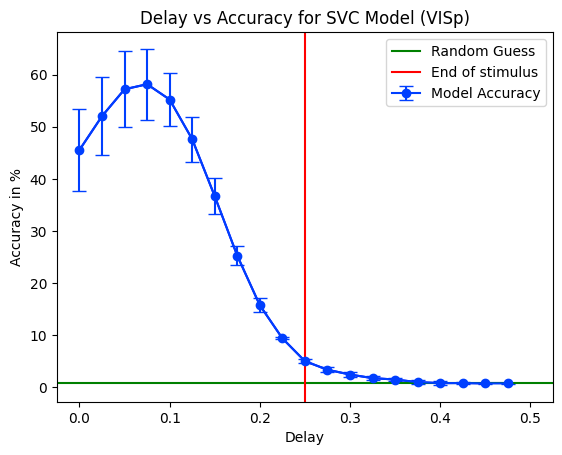

In [88]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (VISp)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

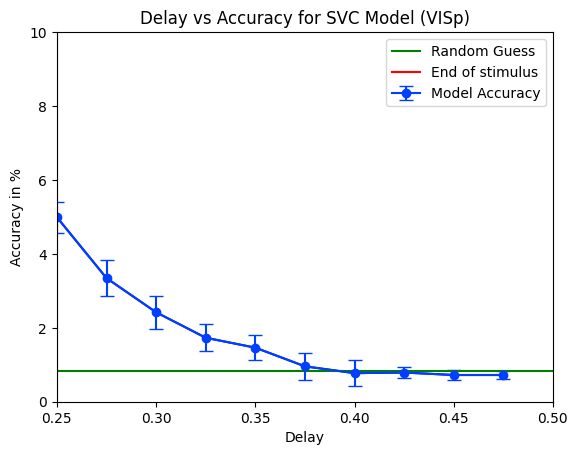

In [90]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.xlim(0.25, 0.5)
plt.ylim(0,10)
plt.title('Delay vs Accuracy for SVC Model (VISp)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

### VISrl

In [91]:
delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, regionstr = "VISrl"))

Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 14.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 17.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 19.6%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 19.2%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 17.0%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 47)
Experiment with regionstr = VISrl, delay = 0.125, partial = None, window_size = None
Cro

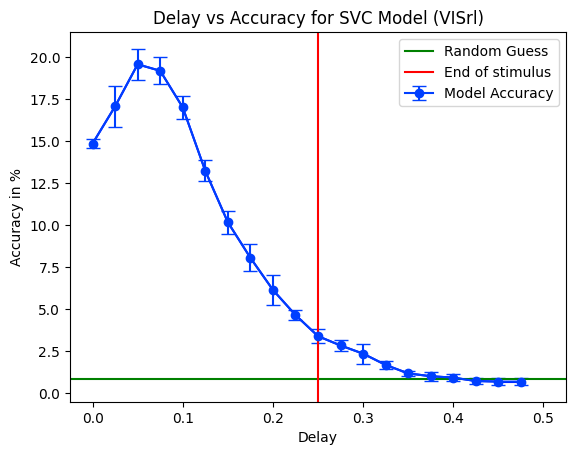

In [92]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (VISrl)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

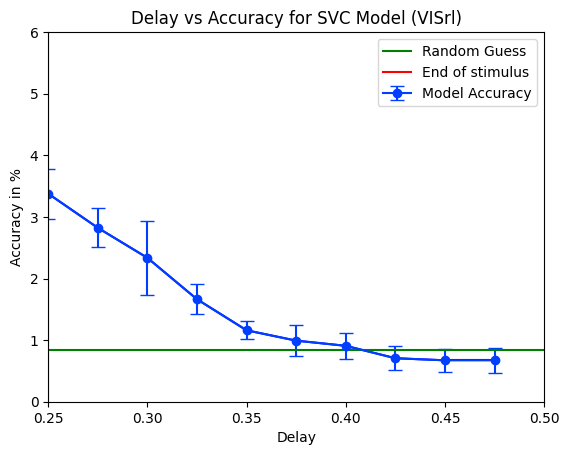

In [94]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.xlim(0.25, 0.5)
plt.ylim(0,6)
plt.title('Delay vs Accuracy for SVC Model (VISrl)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

In [97]:
#find the brain regions which can be experimented on for natural scenes

regions = oursession.units["ecephys_structure_acronym"].unique()
print(f'Brain regions: {regions}')

Brain regions: ['APN' 'NOT' 'MB' 'DG' 'CA1' 'VISam' 'LP' 'ProS' 'SUB' 'VISp' 'CA3' 'VISl'
 'LGv' 'CA2' 'VISal' 'TH' 'Eth' 'VISrl']


### VISal

In [118]:
#repeat experiment with visual cortex regions

delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, regionstr = "VISal"))

Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 38.4%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 45.5%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 51.0%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 53.5%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 51.3%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 89)
Experiment with regionstr = VISal, delay = 0.125, partial = None, window_size = None
Cro

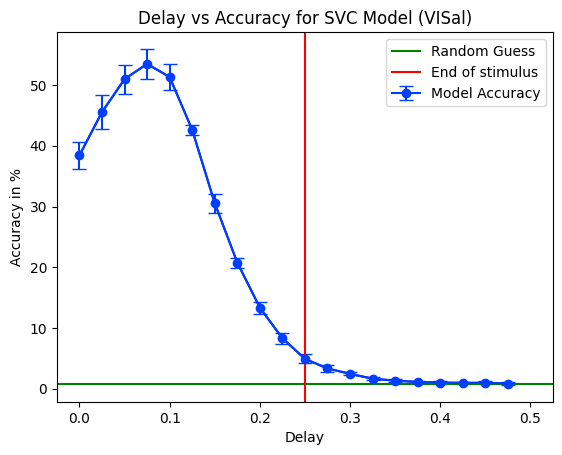

In [119]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (VISal)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

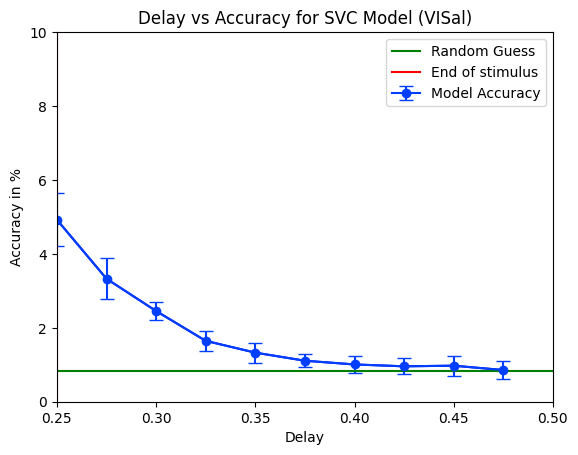

In [120]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.xlim(0.25,0.50)
plt.ylim(0,10)
plt.title('Delay vs Accuracy for SVC Model (VISal)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

### VISl

In [110]:
#repeat experiment with visual cortex regions

delays = np.arange(0.0, 0.50, 0.025)
accuracies = []
for delay in delays:
    accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, regionstr = "VISl"))

Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 36.0%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.025, partial = None, window_size = None
Cross-validated mean accuracy: 44.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 49.6%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.07500000000000001, partial = None, window_size = None
Cross-validated mean accuracy: 51.6%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 47.7%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 78)
Experiment with regionstr = VISl, delay = 0.125, partial = None, window_size = None
Cross-val

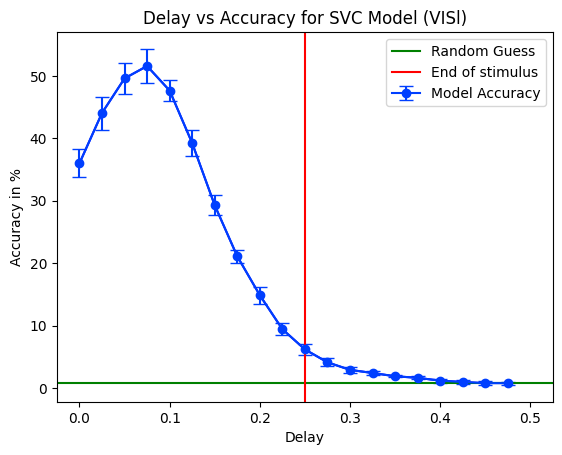

In [114]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.title('Delay vs Accuracy for SVC Model (VISl)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

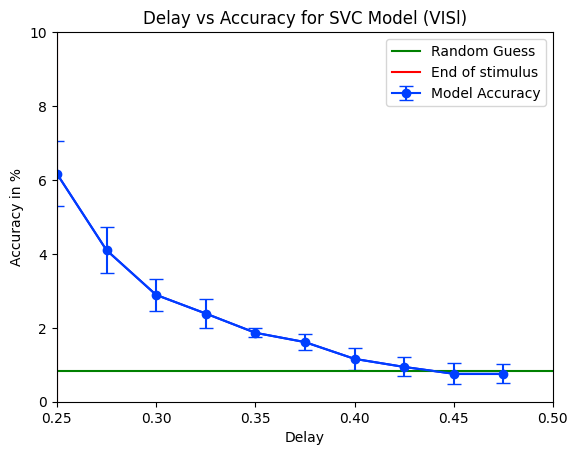

In [117]:
mean_accuracies = [np.mean(acc) for acc in accuracies]
std_accuracies = [np.std(acc) for acc in accuracies]

plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = 'Model Accuracy')
for i in range(len(delays)-1):
    plt.plot([delays[i], delays[i+1]], [mean_accuracies[i], mean_accuracies[i+1]], color='blue')

plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.xlim(0.25,0.50)
plt.ylim(0,10)
plt.title('Delay vs Accuracy for SVC Model (VISl)')
plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.legend()
plt.show()

In [15]:
brain_regions = ["VISam", "VISal", "VISl", "VISrl", "VISp"]

brain_region_results = {}

for region in brain_regions:
    delays = np.arange(0.0, 0.50, 0.05)
    accuracies = []
    for delay in delays:
        accuracies.append(experiment_with_delay(delay, "natural_scenes", natural_scenes, regionstr = region))

    brain_region_results[region] = accuracies

Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.0, partial = None, window_size = None
Cross-validated mean accuracy: 19.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.05, partial = None, window_size = None
Cross-validated mean accuracy: 28.9%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.1, partial = None, window_size = None
Cross-validated mean accuracy: 32.1%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.15000000000000002, partial = None, window_size = None
Cross-validated mean accuracy: 19.7%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.2, partial = None, window_size = None
Cross-validated mean accuracy: 9.4%
Ch?ance of random guess: 0.84%
Data Shape: (5950, 135)
Experiment with regionstr = VISam, delay = 0.25, partial = None, window_size = None
C

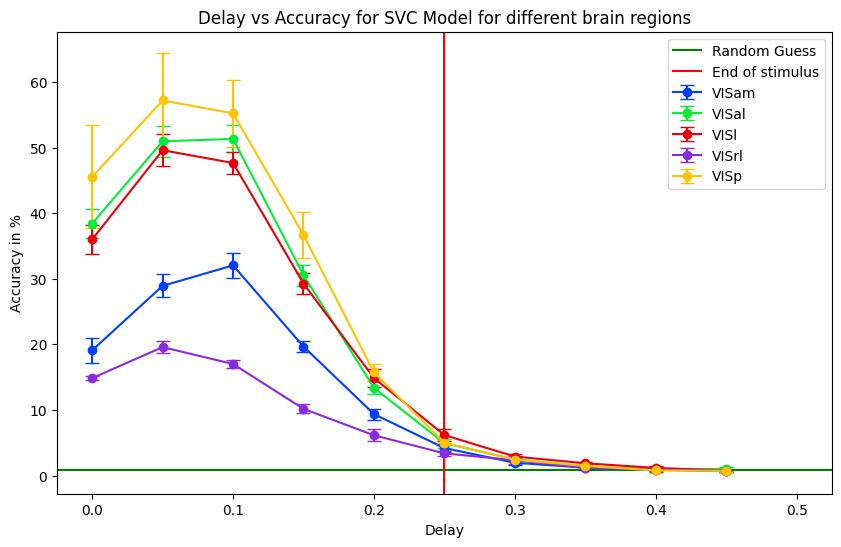

In [16]:
#plot results

plt.figure(figsize=(10, 6))

for region, accuracies in brain_region_results.items():
    mean_accuracies = [np.mean(acc) for acc in accuracies]
    std_accuracies = [np.std(acc) for acc in accuracies]
    plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = f'{region}')

plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model for different brain regions')
plt.xlabel('Delay')
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

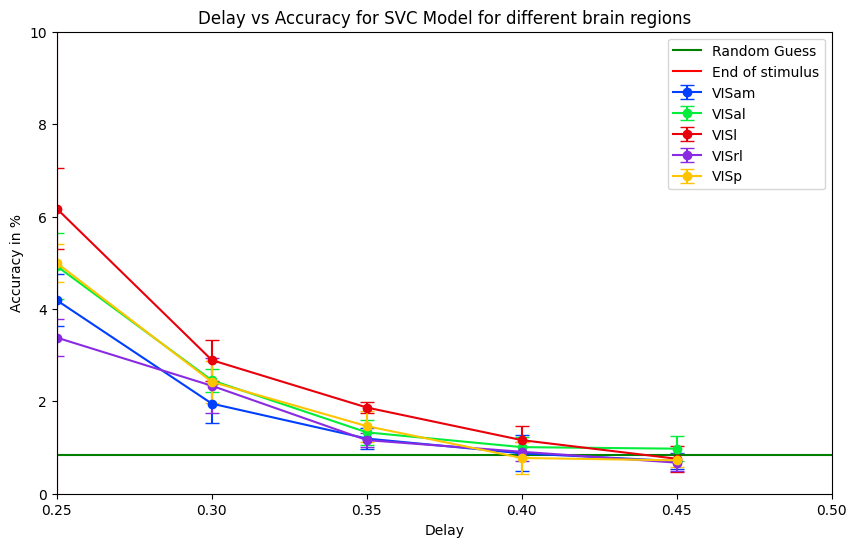

In [17]:
#plot results

plt.figure(figsize=(10, 6))

for region, accuracies in brain_region_results.items():
    mean_accuracies = [np.mean(acc) for acc in accuracies]
    std_accuracies = [np.std(acc) for acc in accuracies]
    plt.errorbar(delays, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, label = f'{region}')

plt.axline((0.25, 0.84), (0.5, 0.84), color = 'green', label = 'Random Guess')
plt.axvline(0.25, 0, 30, color = 'red', label = 'End of stimulus')
plt.title('Delay vs Accuracy for SVC Model for different brain regions')
plt.xlabel('Delay')
plt.xlim(0.25, 0.5)
plt.ylim(0, 10)
plt.ylabel('Accuracy in %')
plt.legend()
plt.show()

In [18]:
#save brain region results to a pickle file

with open('cashed_data/brain_region_results.pickle', 'wb') as pickle_file:
    pickle.dump(brain_region_results, pickle_file)

In [20]:
#load brain region results from a pickle file

with open('cashed_data/brain_region_results.pickle', 'rb') as pickle_file:
    brain_region_results = pickle.load(pickle_file)
brain_region_results

{'VISam': [array([22.43697479, 19.57983193, 17.05882353, 18.7394958 , 17.64705882]),
  array([31.76470588, 29.66386555, 26.47058824, 28.31932773, 28.40336134]),
  array([35.04201681, 33.02521008, 29.24369748, 31.8487395 , 31.09243697]),
  array([20.25210084, 20.08403361, 18.06722689, 20.08403361, 19.83193277]),
  array([10.16806723, 10.33613445,  8.31932773,  9.57983193,  8.40336134]),
  array([4.95798319, 4.03361345, 3.27731092, 4.53781513, 4.11764706]),
  array([2.77310924, 1.8487395 , 1.76470588, 1.76470588, 1.59663866]),
  array([1.51260504, 0.92436975, 1.34453782, 1.2605042 , 0.92436975]),
  array([1.34453782, 0.33613445, 1.00840336, 1.17647059, 0.50420168]),
  array([0.67226891, 0.75630252, 0.58823529, 1.00840336, 0.50420168])],
 'VISal': [array([41.68067227, 39.57983193, 35.54621849, 36.30252101, 38.99159664]),
  array([55.21008403, 51.34453782, 48.23529412, 49.15966387, 50.92436975]),
  array([53.94957983, 51.00840336, 48.99159664, 49.24369748, 53.44537815]),
  array([28.571428